# `fast.ai` starter image classifier
Fast.ai [tutorial](https://docs.fast.ai/tutorial.vision.html). We are going to create a ImageDataLoader from pandas dataframe.

In [1]:
from fastai.vision.all import *

# add parent dir to path
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))
import matplotlib.image as mpimg

from params import PATH_OUT
from tools import get_label

In [2]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
path = PATH_OUT / "data_hashes_reliable_labels_top_shapes.csv"
assert path.exists()

In [4]:
df = pd.read_csv(path, index_col=0)
df.head()

,experiment_group,fname,name,label,hash
0,CTF-P007,../out/data_npy/CTF-P007/plate_17305eb6f8d7_OK.npy,plate_17305eb6f8d7_OK.npy,OK,2aad337f0fac9e7a3b2b640d0f6c7a04
1,CTF-P007,../out/data_npy/CTF-P007/plate_1730d1b301_OK.npy,plate_1730d1b301_OK.npy,OK,b1e922e435b537a29f56a3bf2e8c8270
9,CTF-P007,../out/data_npy/CTF-P007/plate_17301dc7efec_OK.npy,plate_17301dc7efec_OK.npy,OK,c1706ac7244c1b825b8f4a895393e8de
11,CTF-P007,../out/data_npy/CTF-P007/plate_17306b2164df_OK.npy,plate_17306b2164df_OK.npy,OK,b6ab9185bb53614f8b55f5976cf1b22a
18,CTF-P007,../out/data_npy/CTF-P007/plate_17304a596439_OK.npy,plate_17304a596439_OK.npy,OK,c9285ac25716323da1c3429f39de1231


Create `.png` files from `.npy` files:

In [36]:
def npy2png(path_npy, path_png=None):
    # Load the .npy file
    arr = np.load(path_npy)
    # Save the image
    if path_png is None:
        path_png = path_npy.replace('.npy', '.png')
        path_png = path_png.replace('data_npy', 'data_png')
    os.makedirs(os.path.dirname(path_png), exist_ok=True)
    mpimg.imsave(path_png, arr)

In [38]:
for fname in progress_bar(df.fname):
    npy2png(fname)

List available `.png` images and generate a ImageDataLoader from them:

In [5]:
path_png = PATH_OUT / "data_png"
fnames_png = list(path_png.rglob('*.png'))
len(fnames_png)

818

In [6]:
fnames_png[0], get_label(fnames_png[0])

(Path('../out/data_png/CTF-P007/plate_173012f8a705_WARNING.png'), 'WARNING')

In [7]:
img = PILImage.create(fnames_png[0])
img

In [8]:
dls = ImageDataLoaders.from_name_func(
    path, fnames_png, get_label, valid_pct=0.2, seed=42,
    item_tfms=Resize((16, 24)), batch_tfms=None
)

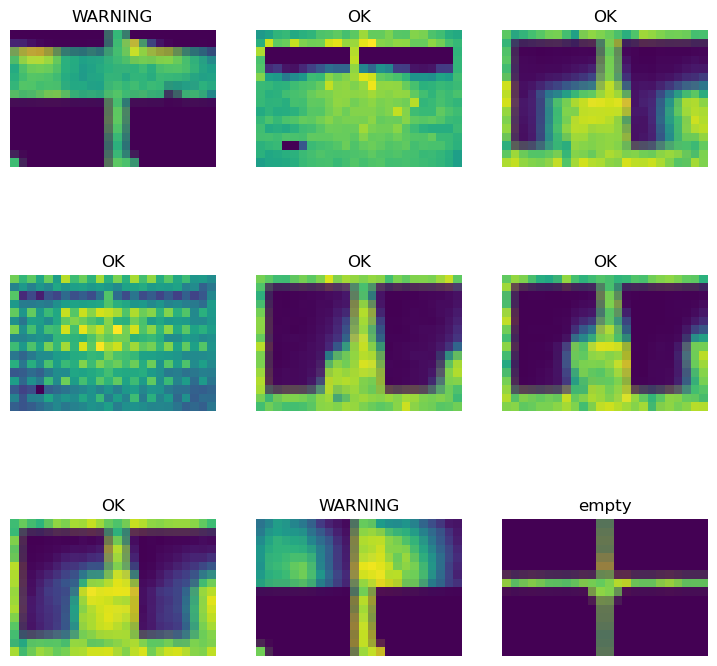

In [9]:
dls.show_batch()

In [10]:
learn = vision_learner(dls, resnet34, path=(PATH_OUT / "data_png"), metrics=error_rate)

SuggestedLRs(valley=0.001737800776027143)

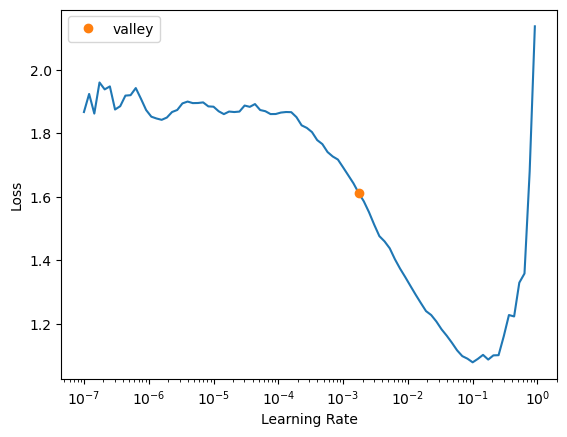

In [11]:
learn.lr_find()

In [12]:
learn.fit_one_cycle(3, 0.001737800776027143)

epoch,train_loss,valid_loss,error_rate,time
0,1.399264,0.449416,0.122699,00:01
1,0.981919,0.455512,0.116564,00:01
2,0.725057,0.415755,0.110429,00:01


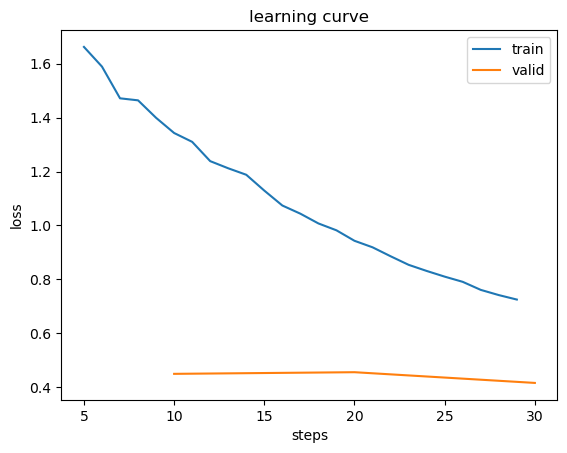

In [13]:
# plot losses
learn.recorder.plot_loss();

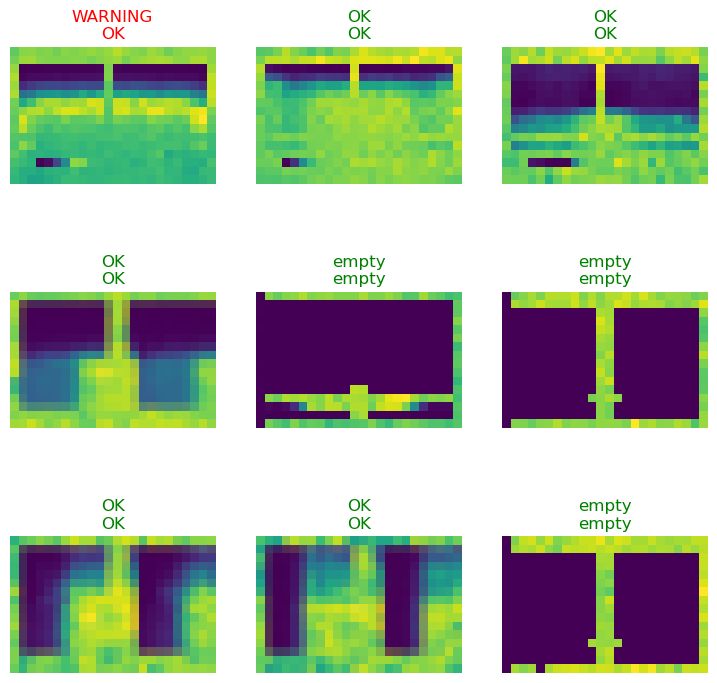

In [14]:
learn.show_results()

In [15]:
interp = Interpretation.from_learner(learn)

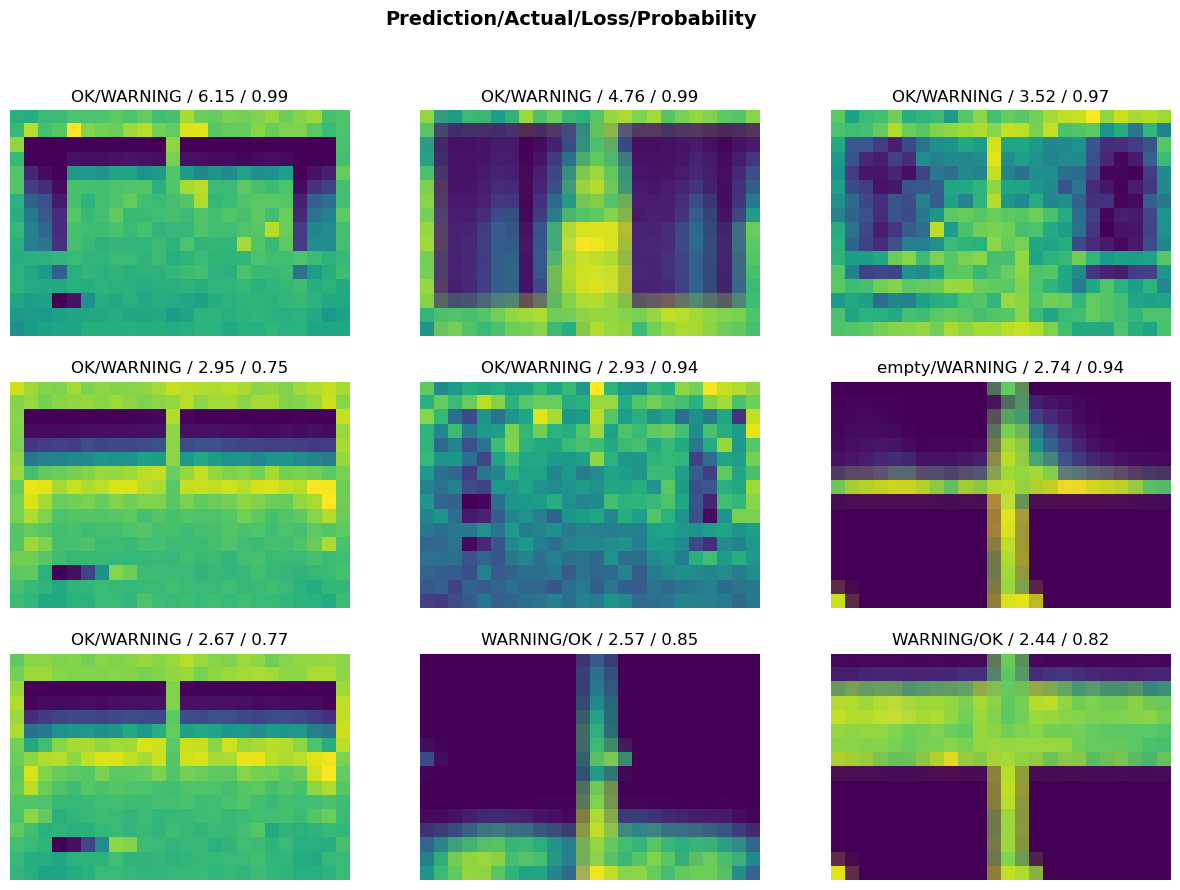

In [16]:
interp.plot_top_losses(9, figsize=(15,10))

In [17]:
classification_interpretation = ClassificationInterpretation.from_learner(learn)

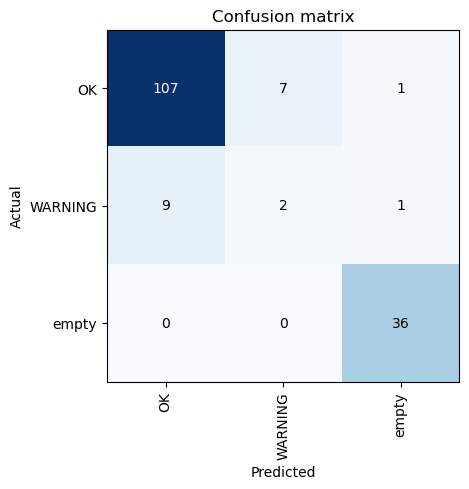

In [18]:
classification_interpretation.plot_confusion_matrix()

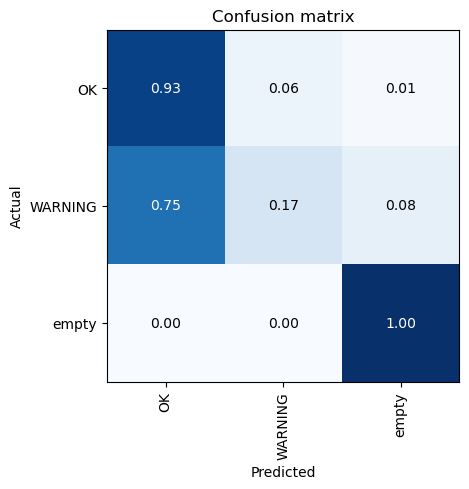

In [19]:
classification_interpretation.plot_confusion_matrix(normalize=True)